In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('data_for_lr.csv')

In [4]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [9]:
data.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data['x'],data['y'],test_size=0.284,random_state=0)
# X_train is train input and X_test is Test Input
# Y_train is the train ouput and Y_test is Test Output

In [33]:
X_train=X_train.values.reshape(500,1)
X_test=X_test.values.reshape(199,1)
Y_train=Y_train.values.reshape(500,1)
Y_test=Y_test.values.reshape(199,1)

In [35]:
print(f'The Sizes of Train and test are {X_train.size},{X_test.size},{Y_train.size},{Y_test.size}')

The Sizes of Train and test are 500,199,500,199


In [36]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [38]:
m=regressor.coef_
c=regressor.intercept_

In [39]:
predicted_Value=regressor.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(Y_test,predicted_Value)

In [41]:
cost

7.511106698033002

Predicting Output for Train Input

In [42]:
y_pred_train=regressor.predict(X_train)

Train input output comparision

In [43]:
from sklearn.metrics import r2_score
r2_score(y_pred_train,Y_train)*100

99.01179535108943

predicting the output for test data

In [44]:
y_pred_test=regressor.predict(X_test)

Test input output comparision

In [45]:
r2_score(y_pred_test,Y_test)*100

99.16556758377165

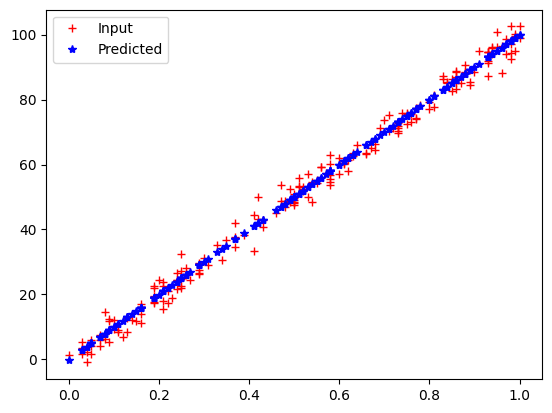

In [51]:
import matplotlib.pyplot as plt
plt.plot(X_test,Y_test,'+',color='red')
plt.plot(X_test,y_pred_test,'*',color='blue')
plt.legend(['Input','Predicted'])
plt.show()